In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# -------------------------------------------- 1 ----------------------------------------------------------
# Read the column description and ensure you understand each attribute
# Study the data distribution in each attribute, share your findings. (5 points)


In [141]:
loan_df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [142]:
loan_df.set_index(loan_df.columns[0])

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0


In [143]:
loan_df.shape

(5000, 14)

In [144]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [145]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [146]:
loan_df.isnull().sum() # Checking for Null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

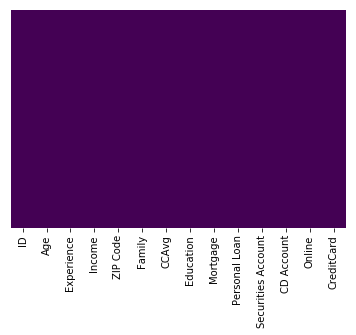

In [147]:
sns.heatmap(loan_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Check for null variables visually

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D42BFB14E0>,
      dtype=object)

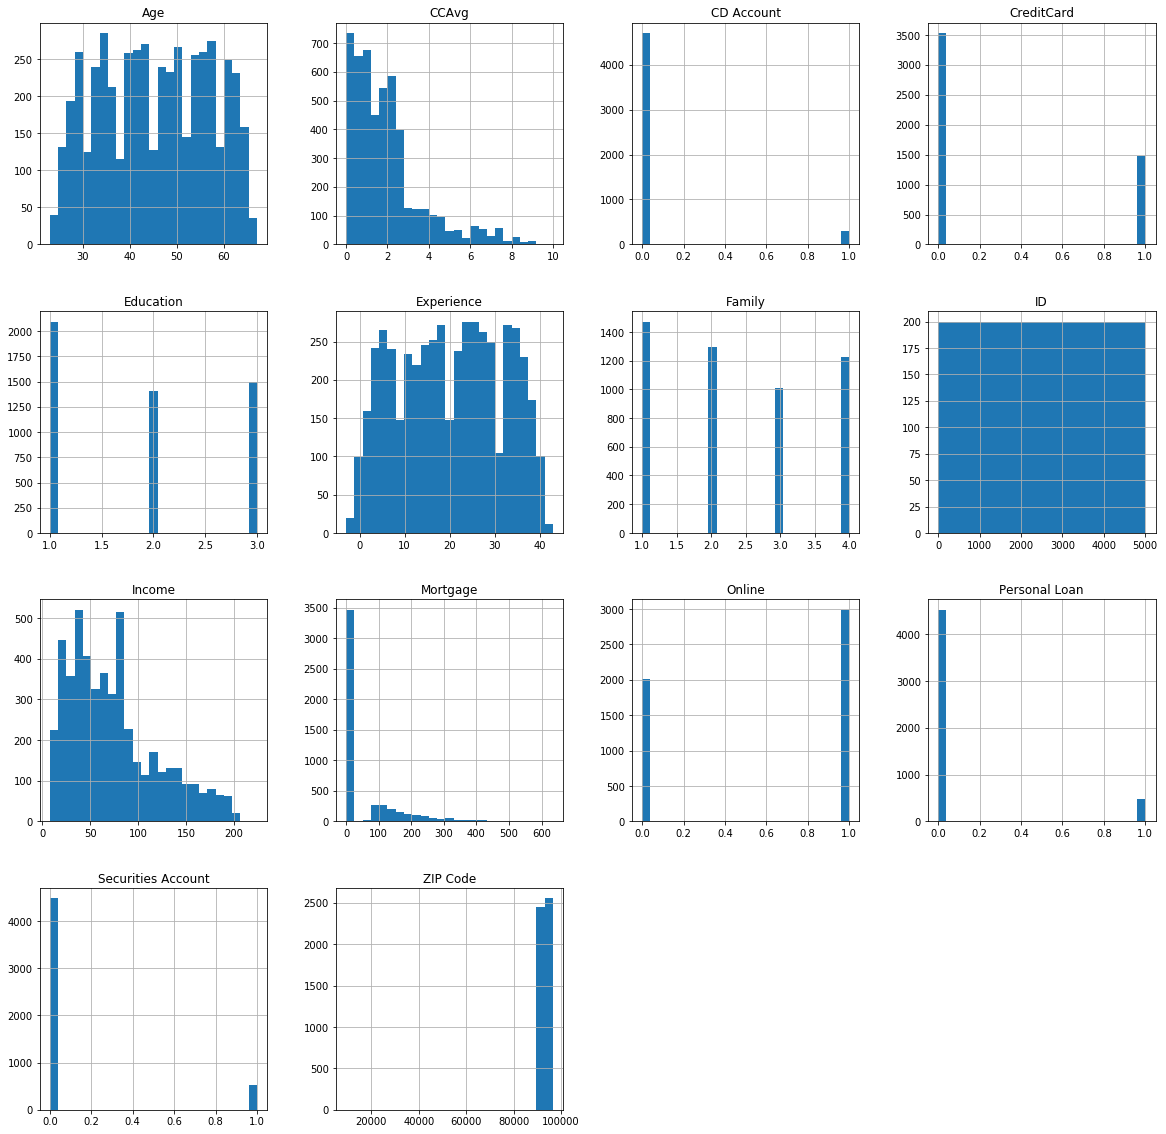

In [148]:
loan_df.hist(figsize=(20,20),bins=25)

In [149]:
# From the above histograms , we can find that 
# The Account Holders age group frequency is higher from 35 to 60
# The Avg spending CC shows a decreasing trend 
# The CD Account is Neglible
# Under Grad Education level is the highest education level among most of the  account holders
# The Annual income of the accunt holders lies in below 100,000$ at the max

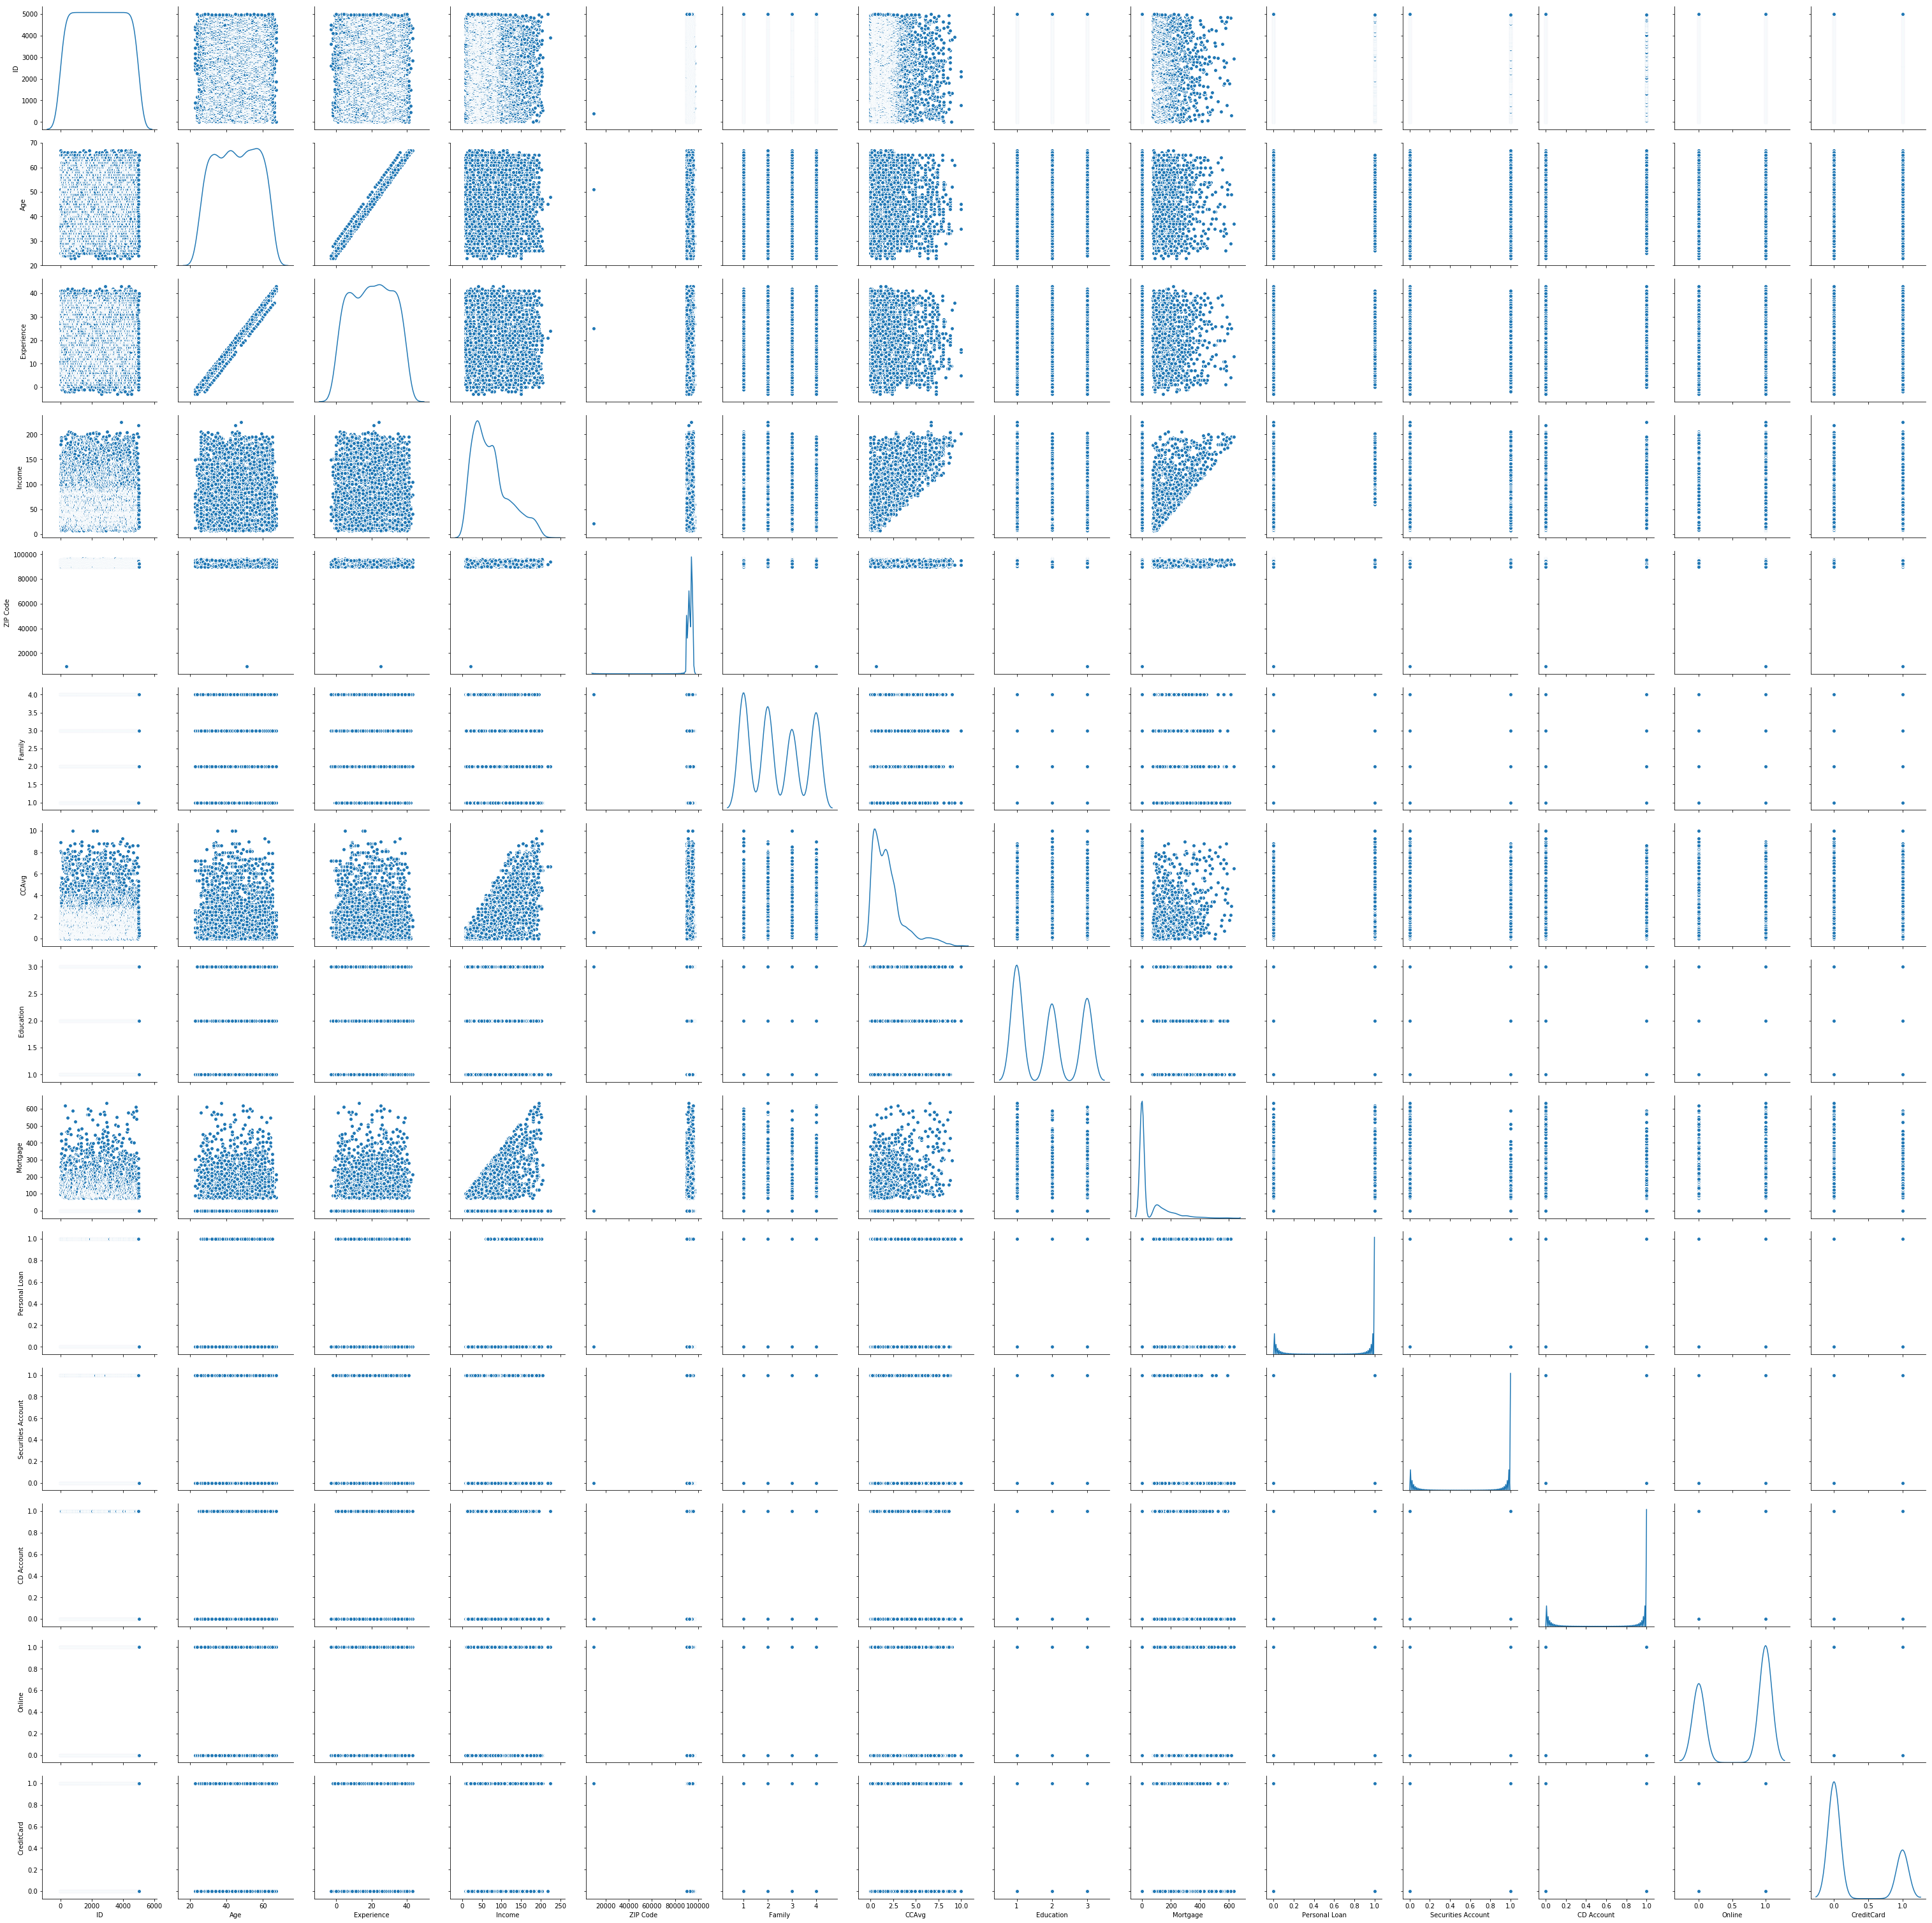

In [150]:
#sns.pairplot(loan_df,size=3,diag_kind='kde')

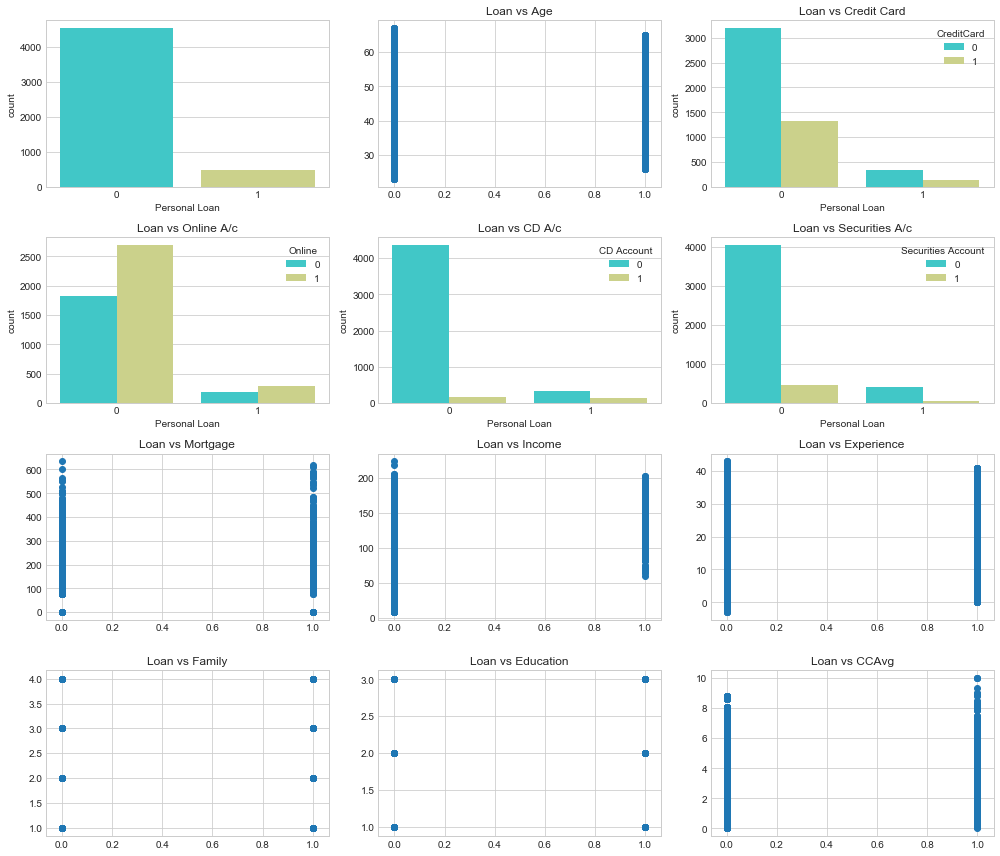

In [153]:
fig = plt.figure(figsize=(14,12))
sns.set_style('whitegrid')
plt.subplot2grid((4,3),(0,0))
sns.countplot(x='Personal Loan',data=loan_df,palette='rainbow')

plt.subplot2grid((4,3),(0,1))
plt.title("Loan vs Age")
plt.scatter(loan_df['Personal Loan'],loan_df.Age, alpha=0.5) # Loan vs Age

plt.subplot2grid((4,3),(0,2))
plt.title("Loan vs Credit Card")
sns.countplot(x='Personal Loan',hue='CreditCard',data=loan_df,palette='rainbow')

plt.subplot2grid((4,3),(1,0))
plt.title("Loan vs Online A/c")
sns.countplot(x='Personal Loan',hue='Online',data=loan_df,palette='rainbow')

plt.subplot2grid((4,3),(1,1))
plt.title("Loan vs CD A/c")
sns.countplot(x='Personal Loan',hue='CD Account',data=loan_df,palette='rainbow')

plt.subplot2grid((4,3),(1,2))
plt.title("Loan vs Securities A/c")
sns.countplot(x='Personal Loan',hue='Securities Account',data=loan_df,palette='rainbow')


plt.subplot2grid((4,3),(2,0))
plt.title("Loan vs Mortgage")
plt.scatter(loan_df['Personal Loan'],loan_df.Mortgage) # Loan vs Mortgage


plt.subplot2grid((4,3),(2,1))
plt.title("Loan vs Income")
plt.scatter(loan_df['Personal Loan'],loan_df.Income) # Loan vs Income

plt.subplot2grid((4,3),(2,2))
plt.title("Loan vs Experience")
plt.scatter(loan_df['Personal Loan'],loan_df.Experience) # Loan vs Experience

plt.subplot2grid((4,3),(3,0))
plt.title("Loan vs Family")
plt.scatter(loan_df['Personal Loan'],loan_df.Family) # Loan vs Family

plt.subplot2grid((4,3),(3,1))
plt.title("Loan vs Education")
plt.scatter(loan_df['Personal Loan'],loan_df.Education) # Loan vs Education

plt.subplot2grid((4,3),(3,2))
plt.title("Loan vs CCAvg")
plt.scatter(loan_df['Personal Loan'],loan_df.CCAvg) # Loan vs CCAvg

plt.tight_layout()

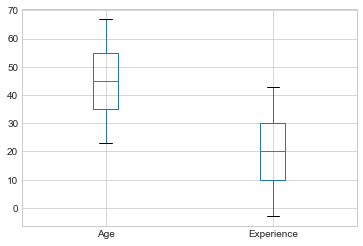

In [154]:
loan_df.boxplot(column=['Age', 'Experience'])

In [155]:
# # No Outliers in Age and Experience

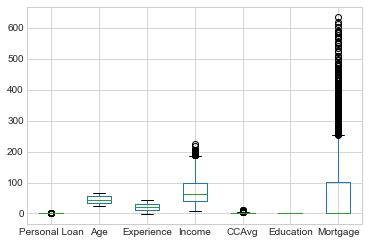

In [157]:
loan_df[['Personal Loan','Age','Experience','Income', 'CCAvg','Education','Mortgage']].boxplot() #Check for outliers

In [158]:
# Huge Outliers in Mortgage , Income and CCAvg

In [159]:
loan_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


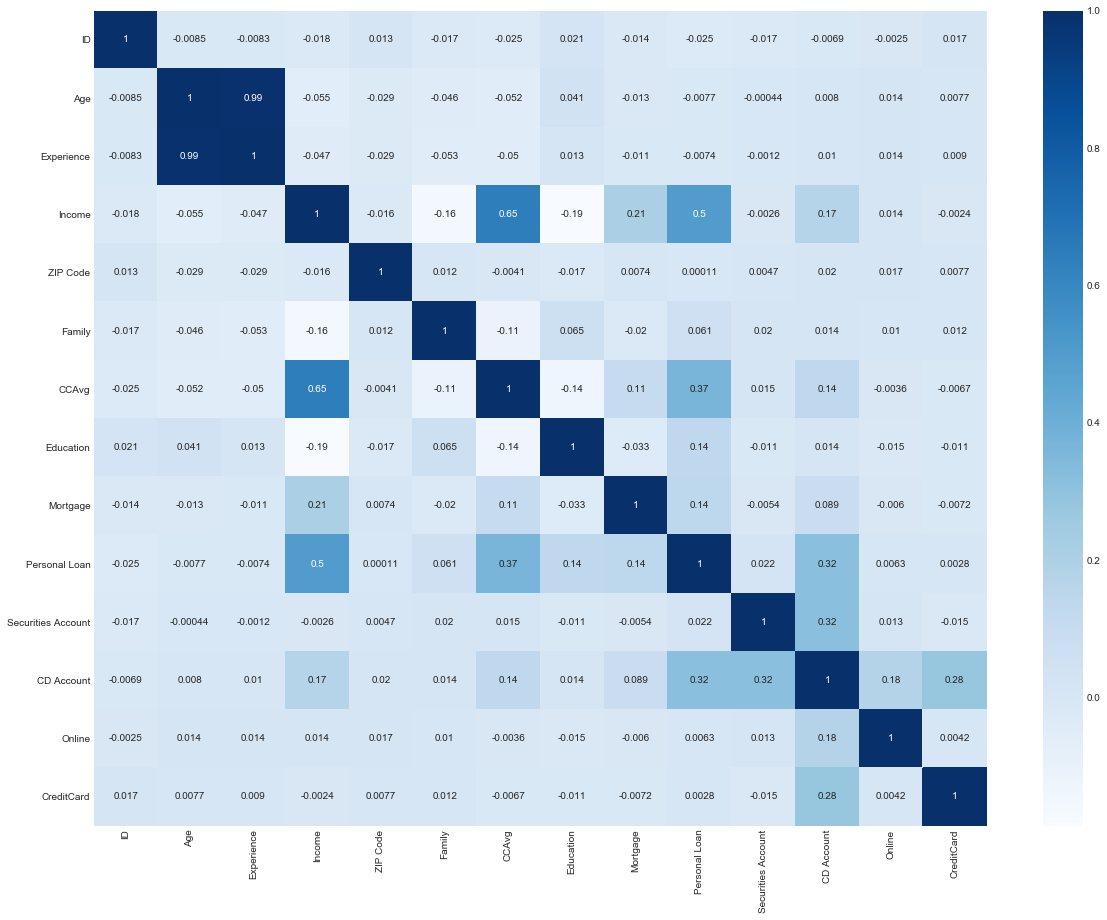

In [160]:
plt.subplots(figsize=(20,15))
sns.heatmap(loan_df.corr(),annot=True,cmap='Blues')

In [161]:
#Observations

# 1. People without credit card are the majority personal loan takers
# 2. Loan takers mostly have income above 60k
# 3. Majority of the Loan takers have Online account

# Collinear Features

# 1.Income vs Personal Loan
# 2.CCAvg vs Income
# 3.Experience vs Age highly correlated

# ------------------------------------------------ 2 -------------------------------------------------------
# Get the target column distribution. Your comments

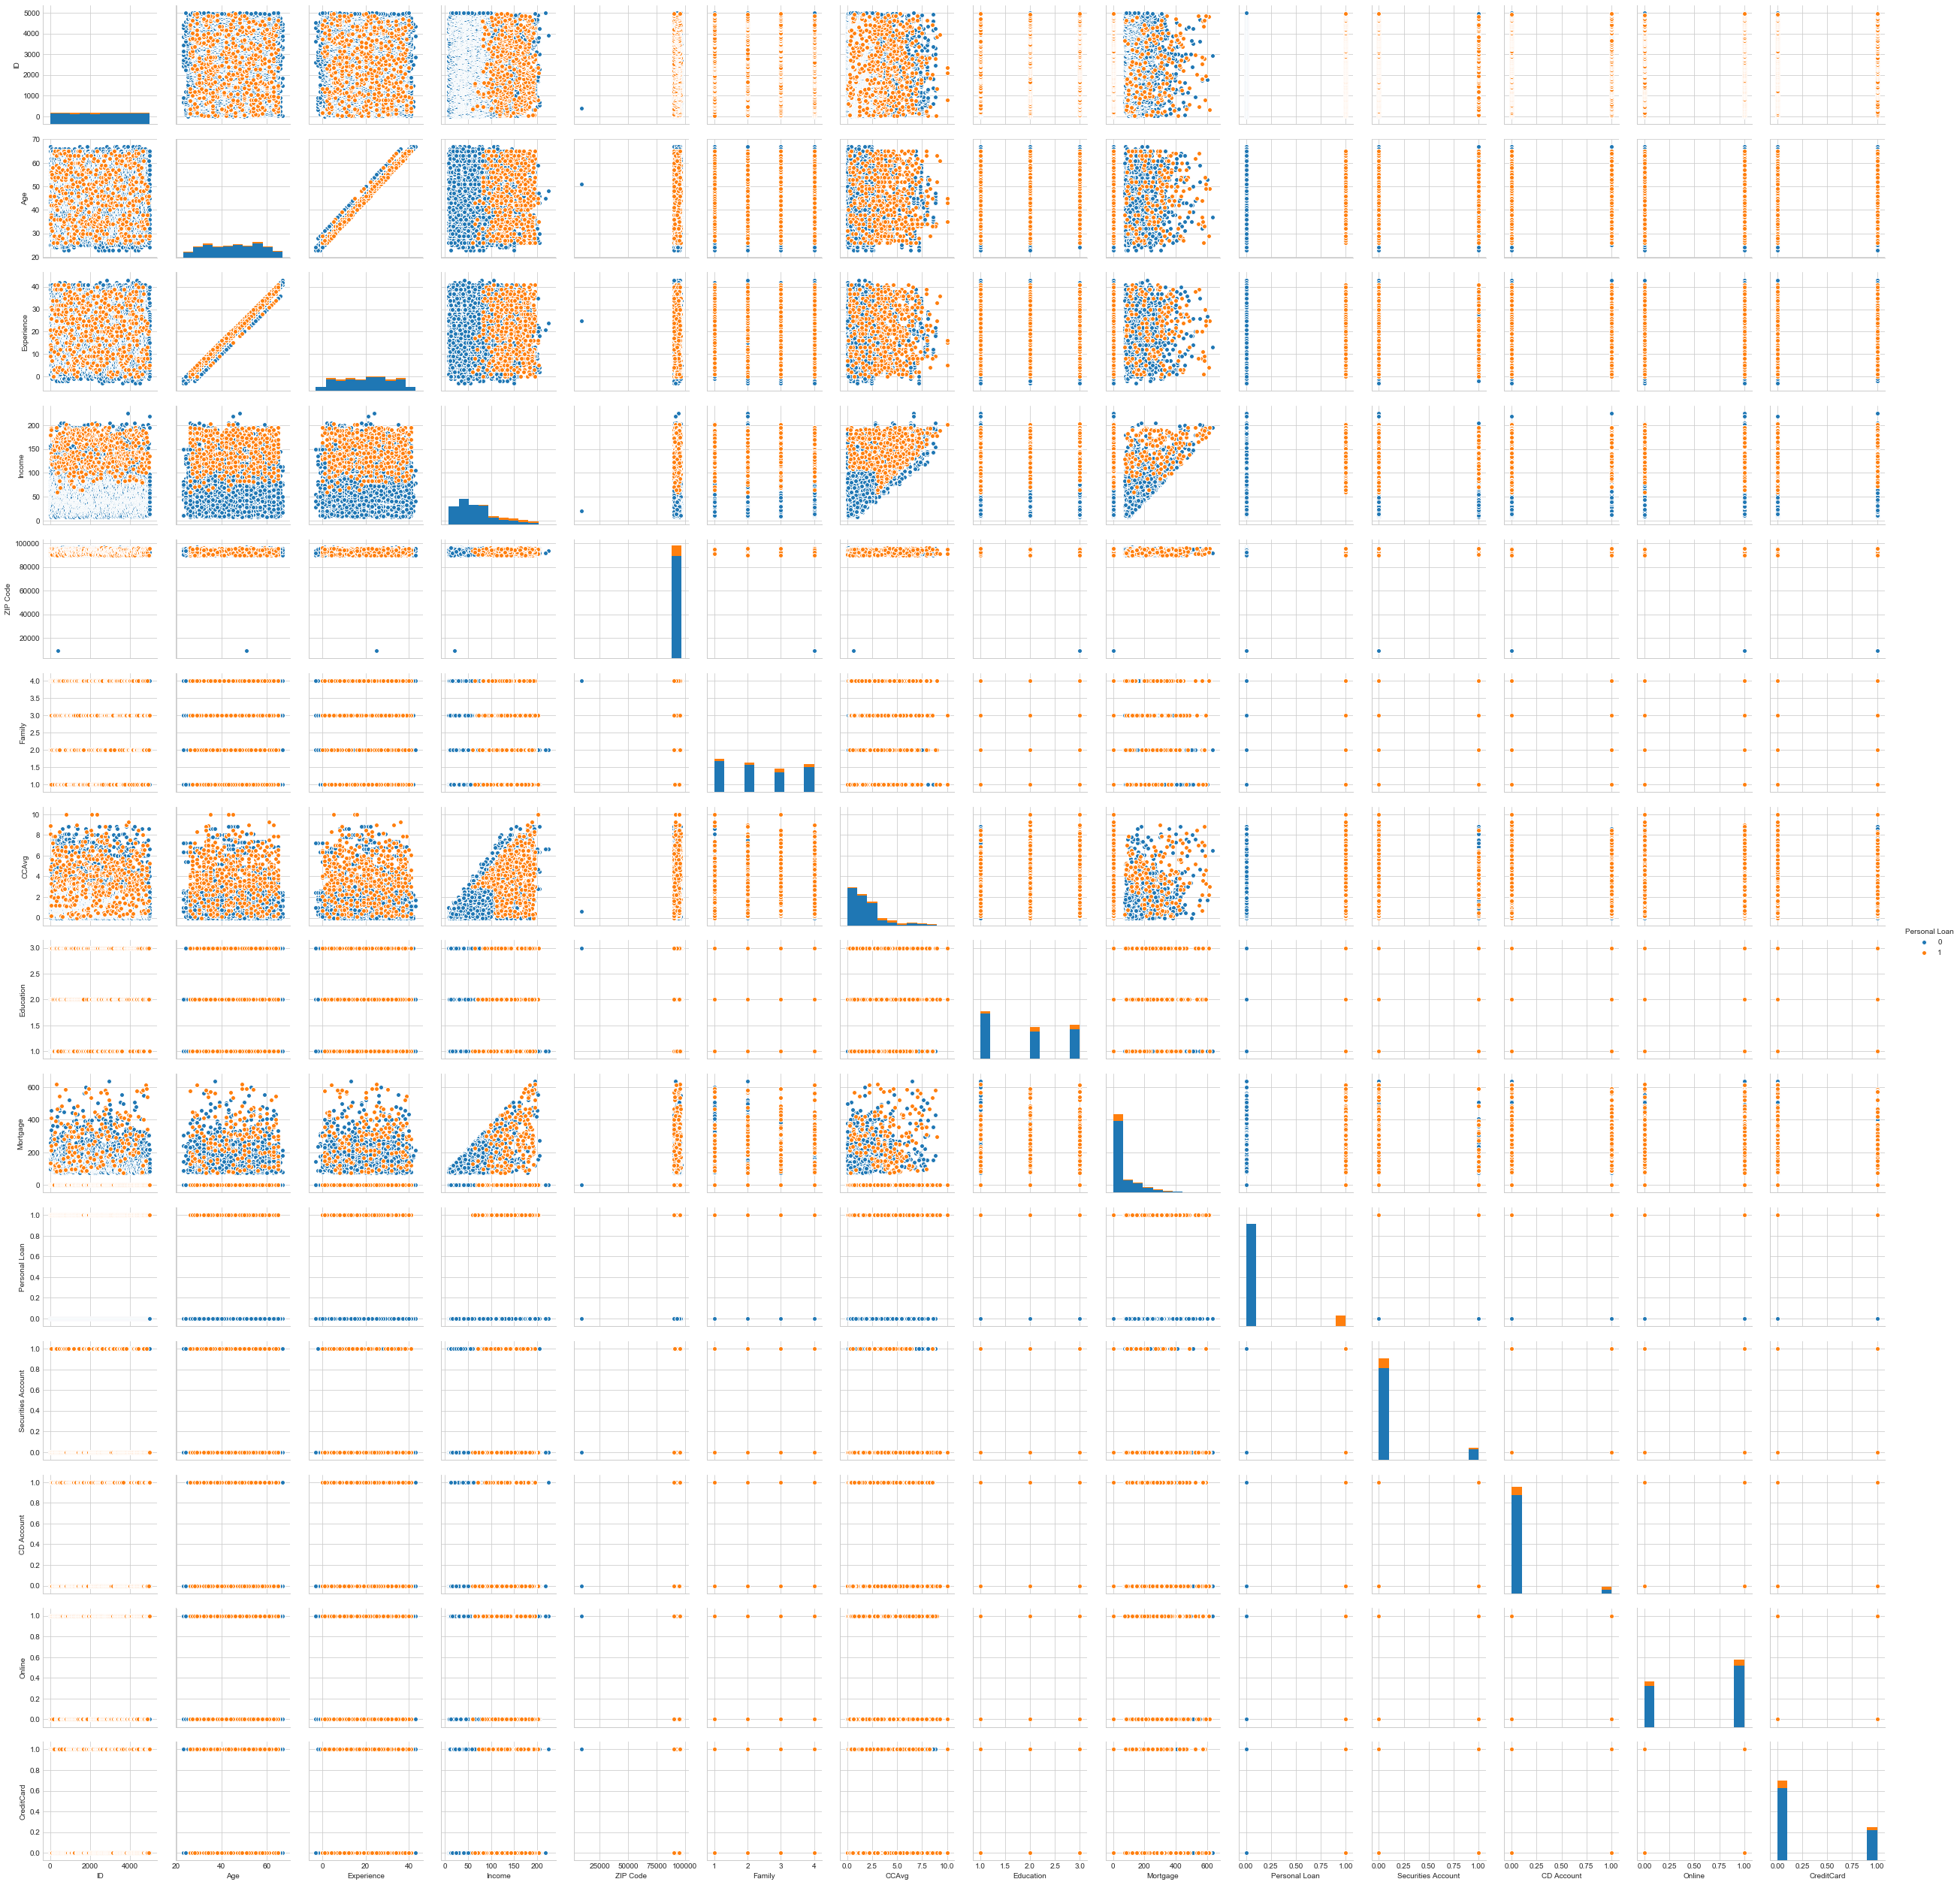

In [162]:
sns.pairplot(loan_df,hue="Personal Loan",size=3,diag_kind='kde')

In [163]:
# Age and Experience has multicollinearity

# ---------------------------------------------- 3 --------------------------------------------------------

# Split the data into training and test set in the ratio of 70:30 respectively

In [165]:
# Feature Selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

x = loan_df[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Securities Account','Mortgage','CD Account','Online','CreditCard']]
y = loan_df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

logr = LogisticRegression()
# Build step forward feature selection
sfs1 = sfs(logr, k_features=6, forward=True, scoring='accuracy', cv=5)
sfs1 = sfs1.fit(x_train, y_train)
results = sfs1.get_metric_dict()
pd.DataFrame(results).T

Training dataset shape: (3500, 12) (3500,)
Testing dataset shape: (1500, 12) (1500,)


,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.906573,0.0127363,"[0.8972895863052782, 0.8971428571428571, 0.918...","(2,)","(Income,)",0.00990929,0.00495464
2,0.940291,0.0155934,"[0.9186875891583453, 0.9442857142857143, 0.954...","(2, 6)","(Income, Education)",0.0121322,0.00606609
3,0.943148,0.0128486,"[0.9243937232524965, 0.95, 0.9528571428571428,...","(2, 4, 6)","(Income, Family, Education)",0.00999665,0.00499832
4,0.94629,0.00769616,"[0.9343794579172611, 0.9485714285714286, 0.95,...","(2, 4, 6, 9)","(Income, Family, Education, CD Account)",0.00598788,0.00299394
5,0.95143,0.00516548,"[0.9457917261055635, 0.9571428571428572, 0.948...","(2, 4, 6, 9, 11)","(Income, Family, Education, CD Account, Credit...",0.00401892,0.00200946
6,0.953144,0.00735993,"[0.9443651925820257, 0.9585714285714285, 0.952...","(2, 4, 6, 7, 9, 11)","(Income, Family, Education, Securities Account...",0.00572627,0.00286314


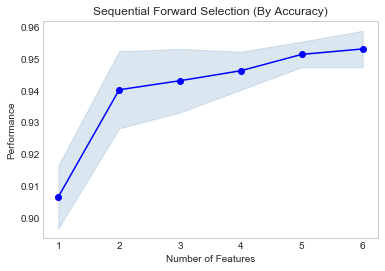

In [166]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (By Accuracy)')
plt.grid()
plt.show()

In [167]:
# Features that gives consistent results are 5

# Income, Family, Education, CD Account, CreditCard

# -----------------------------------------------4----------------------------------------------------------

#  Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability  customer buying personal loans (15 points)

# Print the confusion matrix for all the above models (5 points)

Train set score 95.19999999999999 %
Logistic regression Test set score 94.53333333333333 %
[[1336   15]
 [  67   82]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1351
          1       0.85      0.55      0.67       149

avg / total       0.94      0.95      0.94      1500



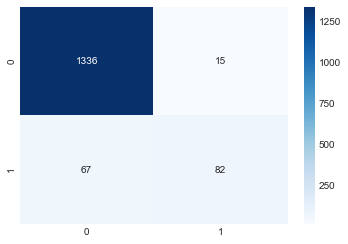

In [168]:
# build Train and testset with above features

# Logistic regression

x = loan_df[['Income','Family','Education','CD Account','CreditCard']]
y = loan_df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

logr = LogisticRegression()
logr.fit(x_train, y_train)

print("Train set score", logr.score(x_train , y_train)* 100, "%") # Training data score
print("Logistic regression Test set score",logr.score(x_test , y_test) *100 ,"%") # Test Score
y_predict = logr.predict(x_test)
matrices = metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))

sns.heatmap(metrics.confusion_matrix(y_test,y_predict), annot=True, cmap='Blues',fmt='g')
print(metrics.classification_report(y_test, y_predict))

Train set score 96.91428571428573 %
KNN Test set score 95.46666666666667 %
[[1348    3]
 [  65   84]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      1351
          1       0.97      0.56      0.71       149

avg / total       0.96      0.95      0.95      1500



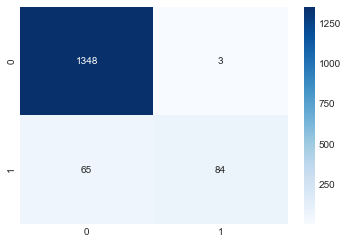

In [174]:
# KNN Algorithm

# Based on Grid search 

# algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
#           weights='uniform'

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

knn.fit(x_train, y_train)

print("Train set score", knn.score(x_train , y_train)* 100, "%") # Training data score
print("KNN Test set score",knn.score(x_test , y_test) *100 ,"%") # Test Score
y_predict = knn.predict(x_test)
matrices = metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict), annot=True, cmap='Blues',fmt='g')

# Lets regularize the model for better accuracy

#k = np.arange(20)+1
#parameters = {'n_neighbors': k}
#clf = GridSearchCV(knn,parameters,cv=10)
#clf

Train set score 91.97142857142858 %
Naive Bayes Test set score 91.06666666666666 %
[[1302   49]
 [  85   64]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1351
          1       0.57      0.43      0.49       149

avg / total       0.90      0.91      0.91      1500



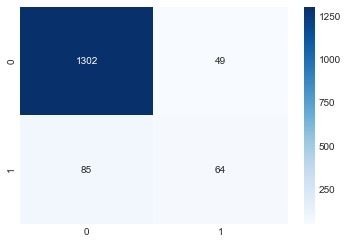

In [175]:
# Naive Bayes

GNB = GaussianNB()
GNB.fit(x_train, y_train)

print("Train set score", GNB.score(x_train , y_train)* 100, "%") # Training data score
print("Naive Bayes Test set score",GNB.score(x_test , y_test) *100 ,"%") # Test Score
y_predict = GNB.predict(x_test)
matrices = metrics.confusion_matrix(y_test, y_predict)
print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict), annot=True, cmap='Blues',fmt='g')
print(metrics.classification_report(y_test, y_predict))

# -------------------------------------------------5 -------------------------------------------------------

#  Give your reasoning on which is the best model in this case and why it performs better? (5 points)

# Observations

# Between Logistic , KNN and Naive Bayes - KNN fares better with higher accuracy of 96%

# Also as per the confusion matrix & the Report - the precision is 95 to 96 % on who will opt for a loan or not

# kNN helped to classify the target data into the known classes of the observations in the dataset, then this target data will be classified by a majority vote of its k nearest neighbors and assigned to the class that appears most frequently within the k nearest neighbors .
